In [6]:
from pulser import Pulse
from pulser.waveforms import BlackmanWaveform
import numpy as np
import matplotlib.pyplot as plt
from pulser import DigitalAnalogDevice, Register, Sequence
from pulser_simulation import QutipEmulator
from math import pi
from pulser.devices import AnalogDevice

In [7]:
reg = Register.square(2, spacing=20) # 2x2 array with atoms placed at 20 um apart
seq = Sequence(reg, AnalogDevice)

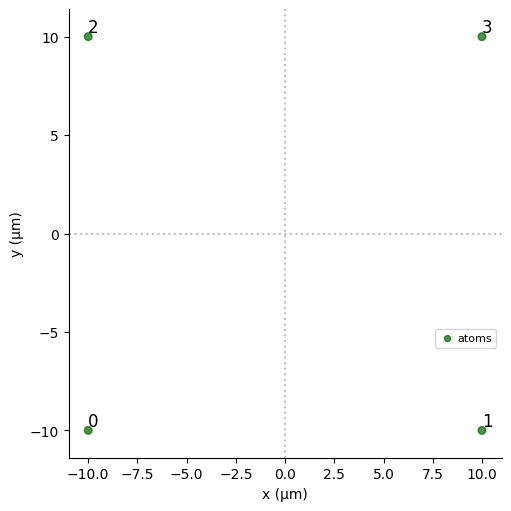

In [8]:
reg.draw()

Integral of the waveform is: 3.141592653589794


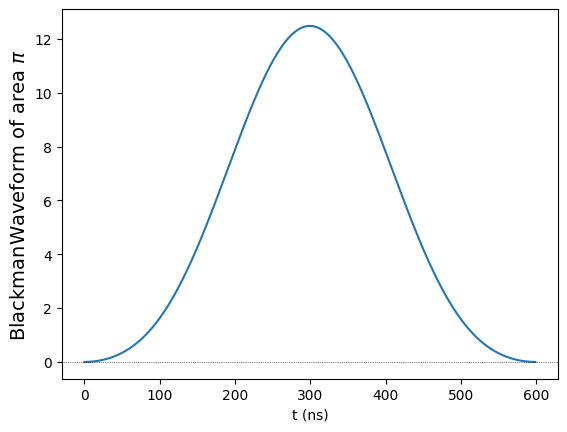

In [9]:
pi_wf = BlackmanWaveform(duration=600, area=pi)
print("Integral of the waveform is:", pi_wf.integral)
pi_wf.draw(ylabel="BlackmanWaveform of area $\\pi$")
pi_pulse = Pulse.ConstantDetuning(amplitude=pi_wf, detuning=0, phase=0)


In [11]:
seq.declare_channel("ch0", "rydberg_global")
seq.add(pi_pulse, "ch0")

In [12]:
print(seq)

Channel: ch0
t: 0 | Initial targets: 0, 1, 2, 3 | Phase Reference: 0.0 
t: 0->600 | Pulse(Amp=Blackman(Area: 3.14) rad/µs, Detuning=0 rad/µs, Phase=0) | Targets: 0, 1, 2, 3




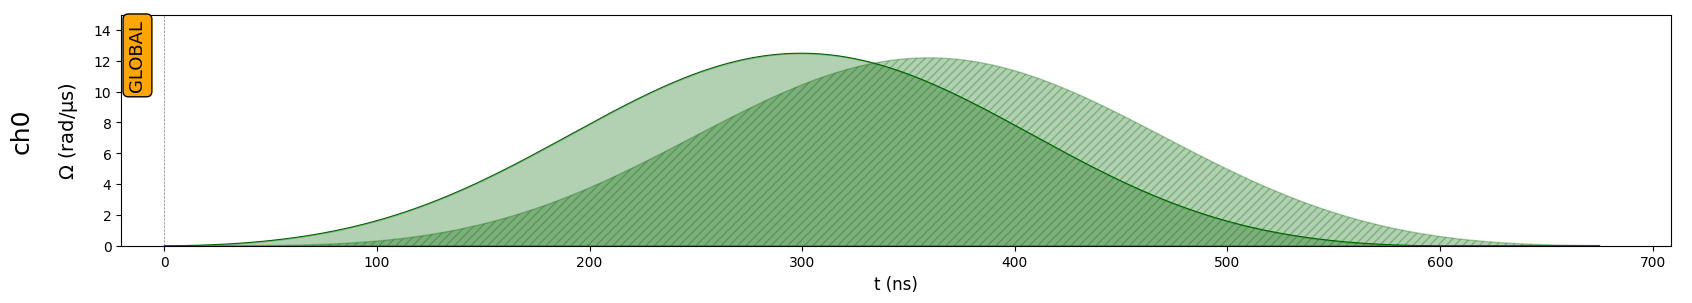

In [13]:
seq.draw()

I don't understand why this is two waves

In [15]:
AnalogDevice.supported_bases

{'ground-rydberg'}

In [16]:
seq.measure(basis="ground-rydberg")

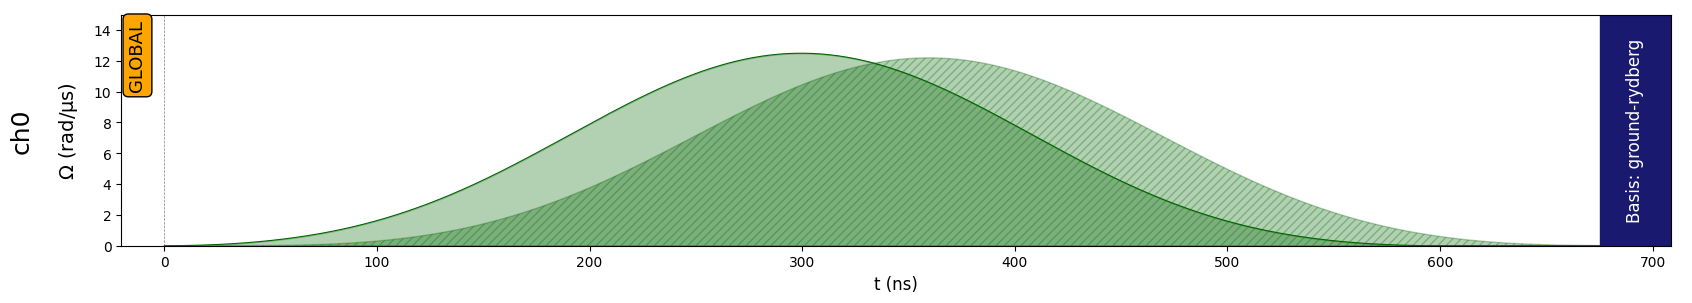

In [17]:
seq.draw()

In [ ]:
import pulser_simulation

sim = pulser_simulation.QutipBackend(seq)
res = sim.run()
print(res.get_final_state())

Quantum object: dims=[[2, 2, 2, 2], [1, 1, 1, 1]], shape=(16, 1), type='ket', dtype=Dense
Qobj data =
[[ 9.99995240e-01+0.00000000e+00j]
 [-1.46331249e-03-7.80082420e-06j]
 [-1.46331249e-03-7.80082475e-06j]
 [-3.49033975e-06+4.86356951e-04j]
 [-1.46331249e-03-7.80082475e-06j]
 [-3.49033975e-06+4.86356951e-04j]
 [ 1.73834335e-06+6.08192833e-05j]
 [ 1.31145623e-08-1.14105895e-06j]
 [-1.46331249e-03-7.80082475e-06j]
 [ 1.73834356e-06+6.08192833e-05j]
 [-3.49033989e-06+4.86356951e-04j]
 [ 1.31145620e-08-1.14105896e-06j]
 [-3.49033989e-06+4.86356951e-04j]
 [ 1.31145620e-08-1.14105896e-06j]
 [ 1.31145690e-08-1.14105948e-06j]
 [-4.76930169e-07-5.13091737e-09j]]


Final state is in four qbit basis. Close to $|rrrr\rangle$.

In [19]:
res.sample_final_state(N_samples=1000)

Counter({'1111': 1000})